# First Inning Score Prediction

In [1]:
import pandas as pd
import pickle

df = pd.read_csv('C:\\Users\\shash\\Desktop\\cdac\\Dataset\\IPL\\ipl.csv')

In [2]:
df.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


In [9]:
# Removing unwanted columns
columns_to_remove =['mid','venue','batsman','bowler','striker','non-striker']
df.drop(labels=columns_to_remove,axis=1,inplace=True)

In [10]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [11]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [12]:
# keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Delhi Daredevils', 'Kings XI Punjab','Sunrisers Hyderabad']


In [13]:
df =df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [14]:
# Removing the first 5 over data in every match
df = df[df['overs']>=5.0]

In [15]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
156,2008-04-19,Chennai Super Kings,Kings XI Punjab,46,1,5.1,45,1,240
157,2008-04-19,Chennai Super Kings,Kings XI Punjab,52,1,5.2,51,1,240
158,2008-04-19,Chennai Super Kings,Kings XI Punjab,52,1,5.3,47,1,240
159,2008-04-19,Chennai Super Kings,Kings XI Punjab,53,1,5.4,48,1,240
160,2008-04-19,Chennai Super Kings,Kings XI Punjab,53,1,5.5,44,1,240


In [16]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Chennai Super Kings' 'Rajasthan Royals' 'Kings XI Punjab'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Mumbai Indians'
 'Sunrisers Hyderabad']
['Kings XI Punjab' 'Delhi Daredevils' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [17]:
# converting the columns 'data' from string into datetime object
# datetime.strptime convert string into date columns
from datetime import datetime
df['date']=df['date'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))

In [18]:
# data preprocessing
# Converting categorical feature using OneHotEncoading method
encoded_df=pd.get_dummies(data=df,columns=['bat_team','bowl_team'])

In [19]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Sunrisers Hyderabad
156,2008-04-19,46,1,5.1,45,1,240,1,0,0,...,0,0,0,0,0,1,0,0,0,0
157,2008-04-19,52,1,5.2,51,1,240,1,0,0,...,0,0,0,0,0,1,0,0,0,0
158,2008-04-19,52,1,5.3,47,1,240,1,0,0,...,0,0,0,0,0,1,0,0,0,0
159,2008-04-19,53,1,5.4,48,1,240,1,0,0,...,0,0,0,0,0,1,0,0,0,0
160,2008-04-19,53,1,5.5,44,1,240,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [21]:
# Rearranging the columns
encoded_df =encoded_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','total']]

In [22]:
# Splitting the data into treain and test set
x_train = encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year <=2016]

x_test = encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year >=2017]

In [23]:
y_train = encoded_df[encoded_df['date'].dt.year <=2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >=2017]['total'].values

In [24]:
# Removing the 'date' column
x_train.drop(labels ='date',axis=True, inplace=True)
x_test.drop(labels ='date',axis=True, inplace=True)

In [25]:
# model building
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [26]:
# creating a pickle file for the classifier
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor,open(filename,'wb'))

# Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [28]:
ridge=Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

C:\Users\shash\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.70189e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\shash\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62395e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\shash\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.2378e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\shash\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33861e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [29]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-305.6816780232057


In [30]:
prediction=ridge_regressor.predict(x_test)

C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

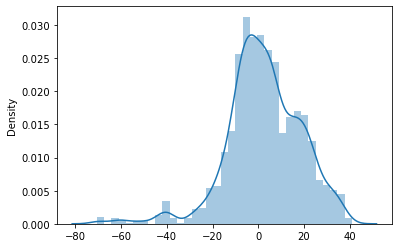

In [31]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [32]:
from sklearn import metrics
import numpy as np
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 12.37796710697243
MSE: 270.5196189023737
RMSE: 16.44748062477575


# Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [41]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error',cv=5)

lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\shash\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3012450.1539264782, tolerance: 1734.0005038680129
  model = cd_fast.enet_coordinate_descent(
C:\Users\shash\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2845510.638127466, tolerance: 1691.7903094179635
  model = cd_fast.enet_coordinate_descent(
C:\Users\shash\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3104954.734989532, tolerance: 1875.192264578371
  model = cd_fast.enet_coordinate_descent(
C:\Users\shash\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

{'alpha': 1}
-298.1281118240073


In [42]:
prediction = lasso_regressor.predict(x_test)

C:\Users\shash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

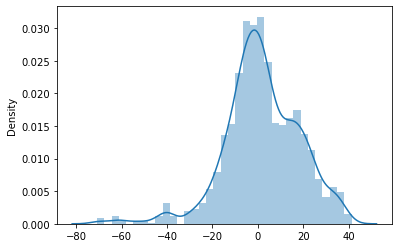

In [43]:
import seaborn as sns
sns.distplot(y_test -prediction)